### **Projet Python pour la data-science : prévision des prix de l'immobilier**

Réalisé par Clémence Chevrier et Soline Mignot

**1. Import des modules et des bases de données**

In [5]:
%pip install geopandas

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
import seaborn as sns
import scipy
from scipy.stats import norm

In [8]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
path = '/content/drive/MyDrive/2A_Python pour la data science/'
df= pd.read_csv(path+'valeursfoncieres-2022.txt', sep='|',low_memory=False)
df.head(5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,24.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,140.0,3.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,510.0


On affiche toutes les colonnes pour pouvoir retirer celles qui sont inutiles

In [10]:
print(df.columns)
df.head()

Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')


,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,24.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,140.0,3.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,510.0


On retire les colonnes dont on ne va pas se servir

In [11]:
df= df.drop(['Identifiant de document', 'Reference document','1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI','B/T/Q', 'Type de voie', 'No disposition','Prefixe de section',
       'Section', 'No plan', 'Nature culture', 'Nature culture speciale','3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot','Surface Carrez du 5eme lot','Code type local','Identifiant local'], axis=1)

In [12]:
df.head()

,Date mutation,Nature mutation,Valeur fonciere,No voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
0,03/01/2022,Vente,"55000,00",13.0,2280,DE LA LIBERTE,1000.0,BOURG-EN-BRESSE,01,53,NaN,7,"24,10",NaN,NaN,1,Appartement,24.0,1.0,NaN
1,03/01/2022,Vente,"143000,00",NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,01,398,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,84.0
2,03/01/2022,Vente,"143000,00",NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,01,398,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,88.0
3,03/01/2022,Vente,"143000,00",98.0,0055,DE LA DOMBES,1480.0,SAVIGNEUX,01,398,NaN,1,"123,23",NaN,NaN,1,Appartement,140.0,3.0,NaN
4,04/01/2022,Vente,"300,00",NaN,B031,AUX PIERRES,1480.0,MESSIMY SUR SAONE,01,243,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,510.0


**2. Nettoyage de la base de données**

On change le type de Valeur fonciere pour en faire un float.

In [13]:
df['Valeur fonciere'] = pd.to_numeric(df['Valeur fonciere'].str.replace(',', '.'), errors='coerce')

### Modélisation d'une carte de France selon le prix du mètre carré

In [14]:
#On importe des données sur les départements
france = gpd.read_file('/content/drive/MyDrive/2A_Python pour la data science/departements-version-simplifiee.geojson')
france.head(5)

,code,nom,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ..."
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ..."
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ..."
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, ..."


In [15]:
#On nettoie les données pour garder uniquement le code du département, la surface réelle du batiment et sa valeur foncière
df_carte = df[['Code departement', 'Surface reelle bati', 'Valeur fonciere']]

In [16]:
#On retire les NaN
df_carte = df_carte.dropna()

In [17]:
print(df_carte.dtypes)
#On s'aperçoit que la valeur foncière n'est pas un float, et que le prix est avec une virgule, donc on va remplacer cette virgule par un point puis convertir en float

Code departement        object
Surface reelle bati    float64
Valeur fonciere        float64
dtype: object


In [18]:
#df_carte['Valeur fonciere'] = pd.to_numeric(df_carte['Valeur fonciere'].str.replace(',', '.'), errors='coerce')


AttributeError: ignored

In [19]:
#On retire les valeurs égales à 0 pour éviter la division par 0
df_carte=df_carte[df_carte['Surface reelle bati']!=0]

In [20]:
df_carte['Prix au metre carre'] = df_carte['Valeur fonciere'] / df_carte['Surface reelle bati']

In [21]:
#On calcule la médiane par département
mediane_par_departement = df_carte.groupby('Code departement')['Prix au metre carre'].median().reset_index()

In [22]:
#On joint les données des deux dataframe sur le code département
merged_data = france.merge(mediane_par_departement, how='left', left_on='code', right_on='Code departement')

In [23]:
merged_data.head(5)

,code,nom,geometry,Code departement,Prix au metre carre
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...",01,2736.842105
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...",02,1407.185629
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ...",03,1368.421053
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ...",04,2410.000000
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, ...",05,2785.714286


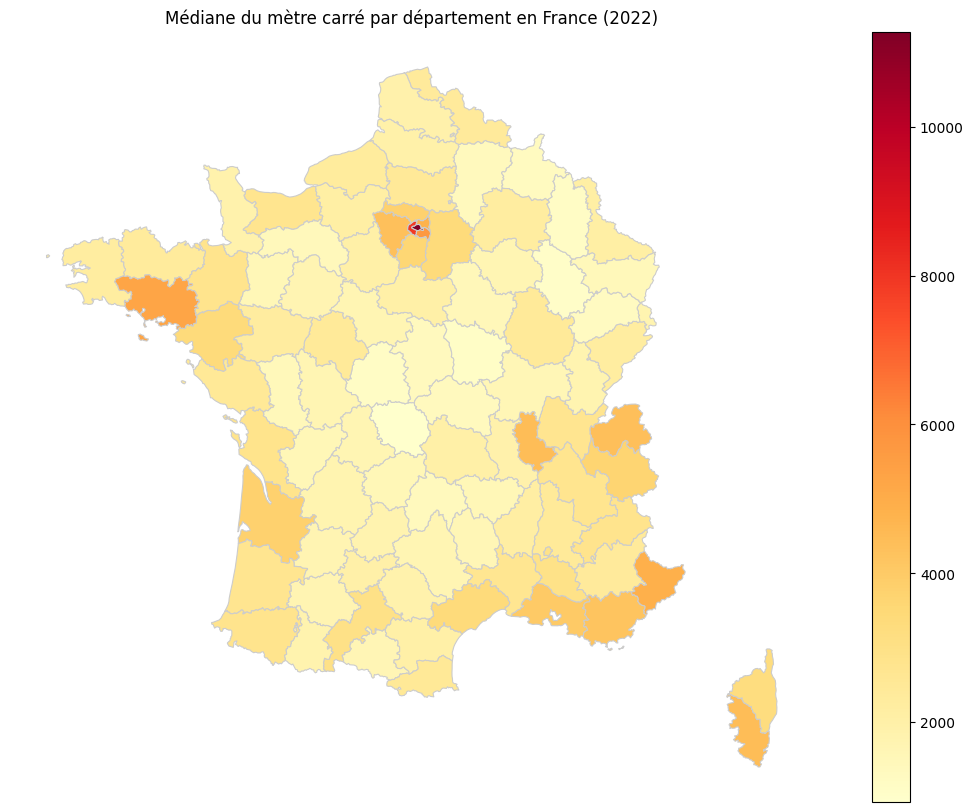

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Prix au metre carre', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Médiane du mètre carré par département en France (2022)')
ax.set_axis_off()
plt.show()

In [25]:
# Emplacement des gares en Ile-de-France
path = '/content/drive/MyDrive/2A_Python pour la data science/'
df_stations= pd.read_csv(path+'emplacement-des-gares-idf.csv', sep=';',low_memory=False)
df_stations.head(5)

,geo_point_2d,geo_shape,id_gares,nom_gares,nom_so_gar,nom_su_gar,id_ref_zdc,nom_zdc,id_ref_zda,nom_zda,...,termetro,tertram,terval,exploitant,idf,principal,x,y,picto,nom_iv
0,"48.96375542868628,2.372103138402568","{""coordinates"": [2.372103138402568, 48.9637554...",643,Pierrefitte Stains,NaN,NaN,72787,Pierrefitte - Stains,43179,Pierrefitte - Stains,...,0,0,0,SNCF,1,0,654024.0938,6.873939e+06,https://data.iledefrance-mobilites.fr/api/v2/c...,Pierrefitte Stains
1,"48.78031379546215,2.312307716888593","{""coordinates"": [2.312307716888593, 48.7803137...",102,Bourg-la-Reine,NaN,NaN,70033,Bourg-la-Reine,43097,Bourg-la-Reine,...,0,0,0,RATP,1,0,649468.2085,6.853578e+06,https://data.iledefrance-mobilites.fr/api/v2/c...,Bourg-la-Reine
2,"48.43449061192662,2.376672818506991","{""coordinates"": [2.376672818506991, 48.4344906...",106,Boutigny,NaN,NaN,59565,Boutigny,47895,Boutigny,...,0,0,0,SNCF,1,0,653894.1827,6.815094e+06,https://data.iledefrance-mobilites.fr/api/v2/c...,Boutigny
3,"48.97066504738864,2.0777317645655975","{""coordinates"": [2.077731764565597, 48.9706650...",7,Achères-Ville,NaN,NaN,73604,Achères Ville,46647,Achères Ville,...,0,0,0,SNCF,1,0,632479.4115,6.874919e+06,https://data.iledefrance-mobilites.fr/api/v2/c...,Achères-Ville
4,"48.31129627381493,2.0035250000979885","{""coordinates"": [2.003525000097989, 48.3112962...",18,Angerville,NaN,NaN,59403,Angerville,47917,Angerville,...,0,0,0,SNCF,1,0,626121.8463,6.801685e+06,NaN,Angerville


In [26]:
df_stations.drop(['id_gares','nom_so_gar',
       'nom_su_gar','id_ref_zdc','nom_zdc', 'id_ref_zda', 'nom_zda','idrefliga', 'idrefligc','tertrain',
       'terrer', 'termetro', 'tertram', 'terval', 'exploitant','idf',
       'principal','picto', 'nom_iv'],axis=1)

,geo_point_2d,geo_shape,nom_gares,res_com,indice_lig,mode,x,y
0,"48.96375542868628,2.372103138402568","{""coordinates"": [2.372103138402568, 48.9637554...",Pierrefitte Stains,RER D,D,RER,654024.0938,6.873939e+06
1,"48.78031379546215,2.312307716888593","{""coordinates"": [2.312307716888593, 48.7803137...",Bourg-la-Reine,RER B,B,RER,649468.2085,6.853578e+06
2,"48.43449061192662,2.376672818506991","{""coordinates"": [2.376672818506991, 48.4344906...",Boutigny,RER D,D,RER,653894.1827,6.815094e+06
3,"48.97066504738864,2.0777317645655975","{""coordinates"": [2.077731764565597, 48.9706650...",Achères-Ville,TRAIN L,L,TRAIN,632479.4115,6.874919e+06
4,"48.31129627381493,2.0035250000979885","{""coordinates"": [2.003525000097989, 48.3112962...",Angerville,GL,GL,TRAIN,626121.8463,6.801685e+06
...,...,...,...,...,...,...,...,...
1191,"48.871692983636265,2.3384630810087437","{""coordinates"": [2.338463081008744, 48.8716929...",Richelieu-Drouot,METRO 8,8,METRO,651475.1884,6.863722e+06
1192,"48.84370073905763,2.4101095555973178","{""coordinates"": [2.410109555597318, 48.8437007...",Alexandra David-Néel,TRAM 3a,3A,TRAMWAY,656707.2179,6.860568e+06
1193,"48.95582939299313,2.3019910195900772","{""coordinates"": [2.301991019590077, 48.9558293...",Épinay-sur-Seine,TRAM 8,8,TRAMWAY,648882.6751,6.873101e+06
1194,"48.764720178615015,2.2658848665512097","{""coordinates"": [2.26588486655121, 48.76472017...",Les Peintres,TRAM 10,10,TRAMWAY,646041.0227,6.851875e+06


### Répartition de la variable type_local

In [27]:
df['Type local'].value_counts(dropna = False, normalize = True).head()

NaN                                         0.406430
Dépendance                                  0.260621
Maison                                      0.163724
Appartement                                 0.138358
Local industriel. commercial ou assimilé    0.030868
Name: Type local, dtype: float64

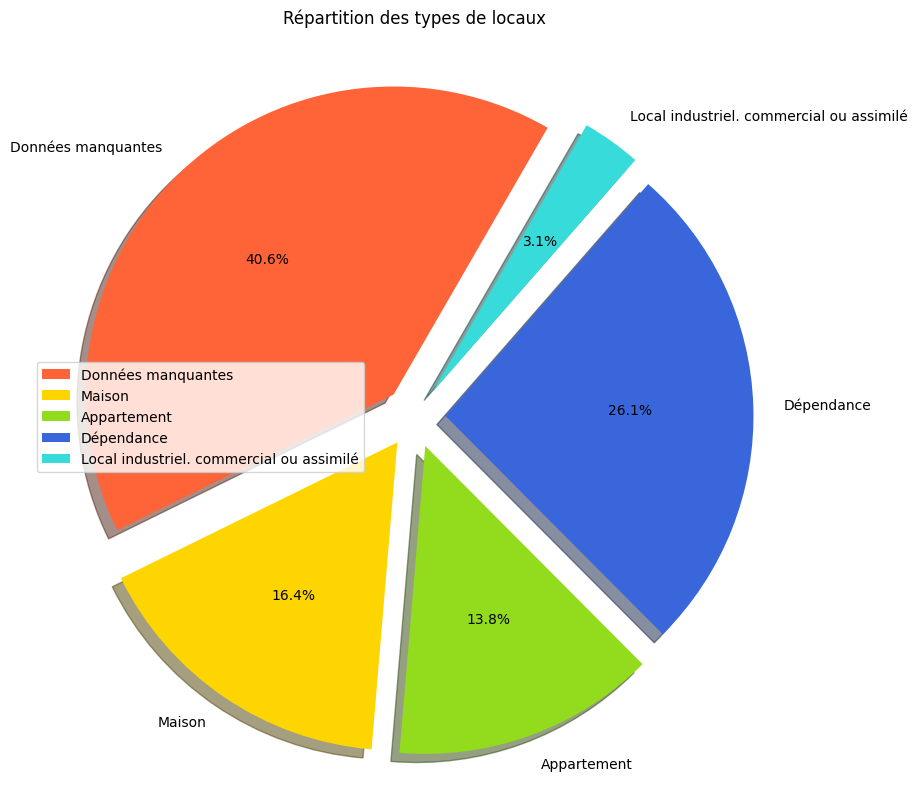

In [28]:
plt.figure(figsize=(10,10))
labels = ['Données manquantes', 'Maison', 'Appartement', 'Dépendance', 'Local industriel. commercial ou assimilé']
colors = ['#ff6338','#ffd500','#92db1d','#3967db','#37dbd9']
area = [40.6, 16.4, 13.8, 26.1, 3.1]
explode = (0.1,0.1,0.1,0.1,0.1)
plt.pie(area, labels=labels, explode=explode, colors= colors, startangle=60, autopct='%1.1f%%',shadow='True')
plt.title(label= 'Répartition des types de locaux')
plt.legend()
plt.show()

In [29]:
df['Nature mutation'].value_counts(dropna = False, normalize = True).head()

Vente                                 0.924123
Vente en l'état futur d'achèvement    0.060762
Echange                               0.009789
Vente terrain à bâtir                 0.003090
Adjudication                          0.002041
Name: Nature mutation, dtype: float64

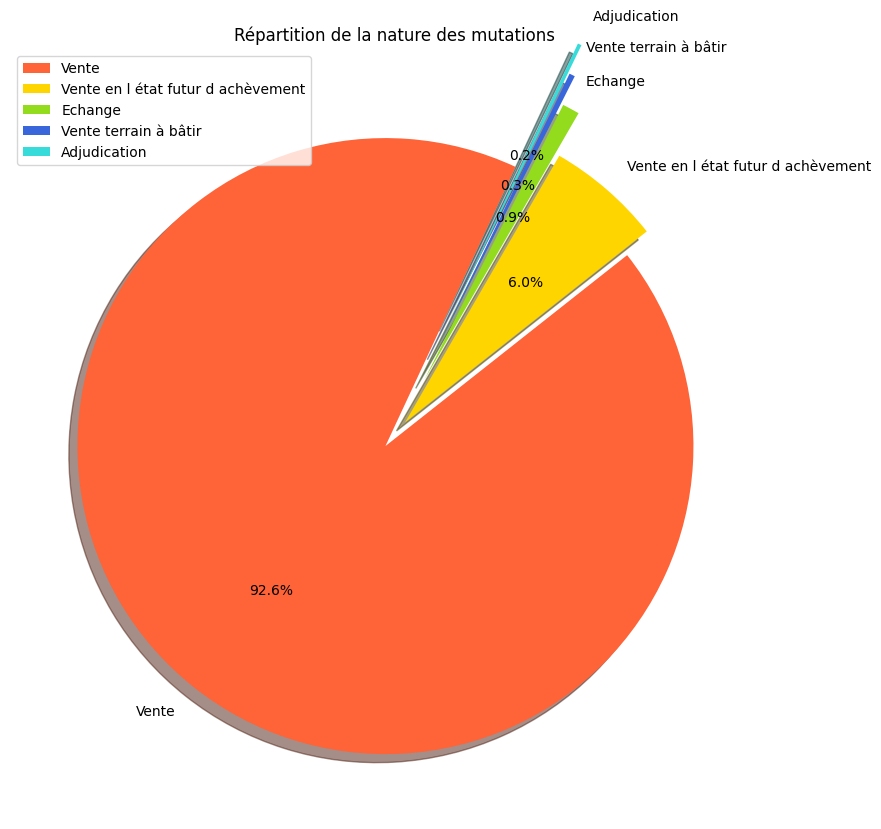

In [30]:
plt.figure(figsize=(10,10))
labels = ['Vente', 'Vente en l état futur d achèvement', 'Echange', 'Vente terrain à bâtir','Adjudication']
colors = ['#ff6338','#ffd500','#92db1d','#3967db','#37dbd9']
area = [92.4,6.0,0.9,0.3,0.2]
explode = (0.05,0.05,0.2,0.3,0.4)
plt.pie(area, labels=labels, explode=explode, colors= colors, startangle=65, autopct='%1.1f%%',shadow='True')
plt.title(label= 'Répartition de la nature des mutations')
plt.legend()
plt.show()

In [31]:
df_density=df.dropna(subset=['Valeur fonciere'])

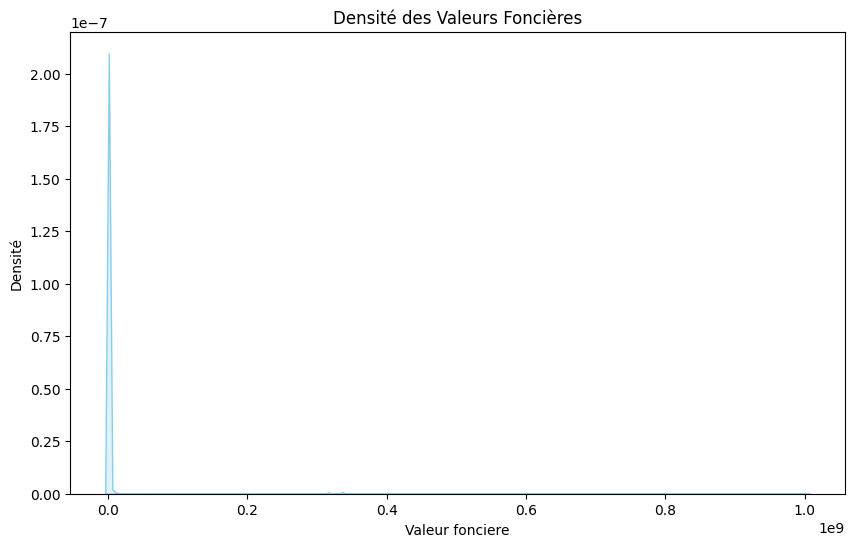

In [33]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_density['Valeur fonciere'], fill=True, color='skyblue')
plt.xlabel('Valeur fonciere')
plt.ylabel('Densité')
plt.title('Densité des Valeurs Foncières')
plt.show()

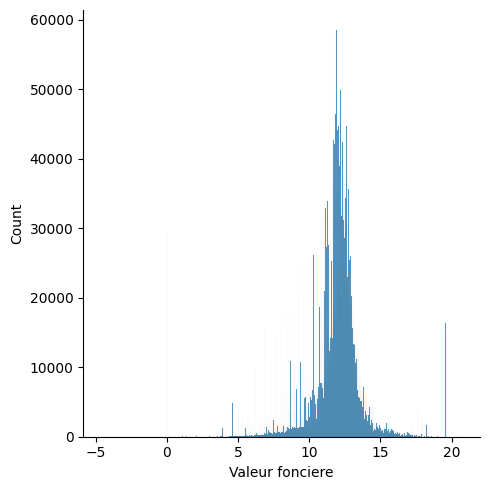

<Figure size 640x480 with 0 Axes>

In [34]:
import scipy
from scipy.stats import norm
y = np.log(df_density['Valeur fonciere'])
sns.displot(y);
fig = plt.figure()